# DS de traitement d'image - 2022/2023
## Session 1 - Durée : 2h
### Composer sur machine - Remplir les cellules de code marquée *A REMPLIR* (vous pouvez ajouter vos propres cellules de markdown pour expliquer votre méthode et vos résultas)
### Remettre sur le dépôt e-campus ce Jupyter Notebook en fin d'examen 

In [227]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Segmentation d'une image IRM
Il s'agit de segmenter l'image IRM suivante ("mri_brain.png") en 4 régions distinctes :
- le fond
- le crâne qui entoure le cerveau
- la matière blanche (régions sombres à l'intérieur du cerveau)
- la matière grise (régions claires à l'intérieur du cerveau)

![mri_brain](mri_brain.png)

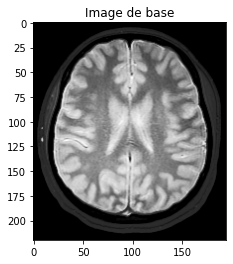

In [228]:
# A REMPLIR
# Lecture et affichage de l'image en niveaux de gris
image = cv2.imread('mri_brain.png',0)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris
plt.show()

## Exercice 1 : segmentation du crâne
Le crâne sera segmenté en appliquant la méthode de **croissance de région** vue en cours.
Pour cela, il vous faudra créer :
- **M**, une image de marqueur binaire contenant des pixels à 1 uniquement dans le crâne
- **C**, une image valant 1 si une certaine condition logique est respectée, 0 sinon

Une fois ces images générées, l'algorithme itératif pourra être lancé jusqu'à convergence. 

Nous pouvons voir après seuillage que nous avons le contour le crane et l'intérieur. Pour enlever l'intérieur du crane nous faisont donc un autre seuillage pour ne récupérer que celui et un peu du crane si nécessaire. Ces 2 opérations nous donne les images 1 et 2 sur la figure. 
Nous soustrayons ces 2 images ce qui nous donne l'image 3, nous avons bien des moeceaux de crane, cependant nous pouvons voir que nous avons aussi des morceaux de l'intérieur, nottament le contour du cerveau. Pour l'enlever nous décidons de faire une érodation, ce qui nous permet d'obtenir notre quatrième image qui est notre image de marqueurs.

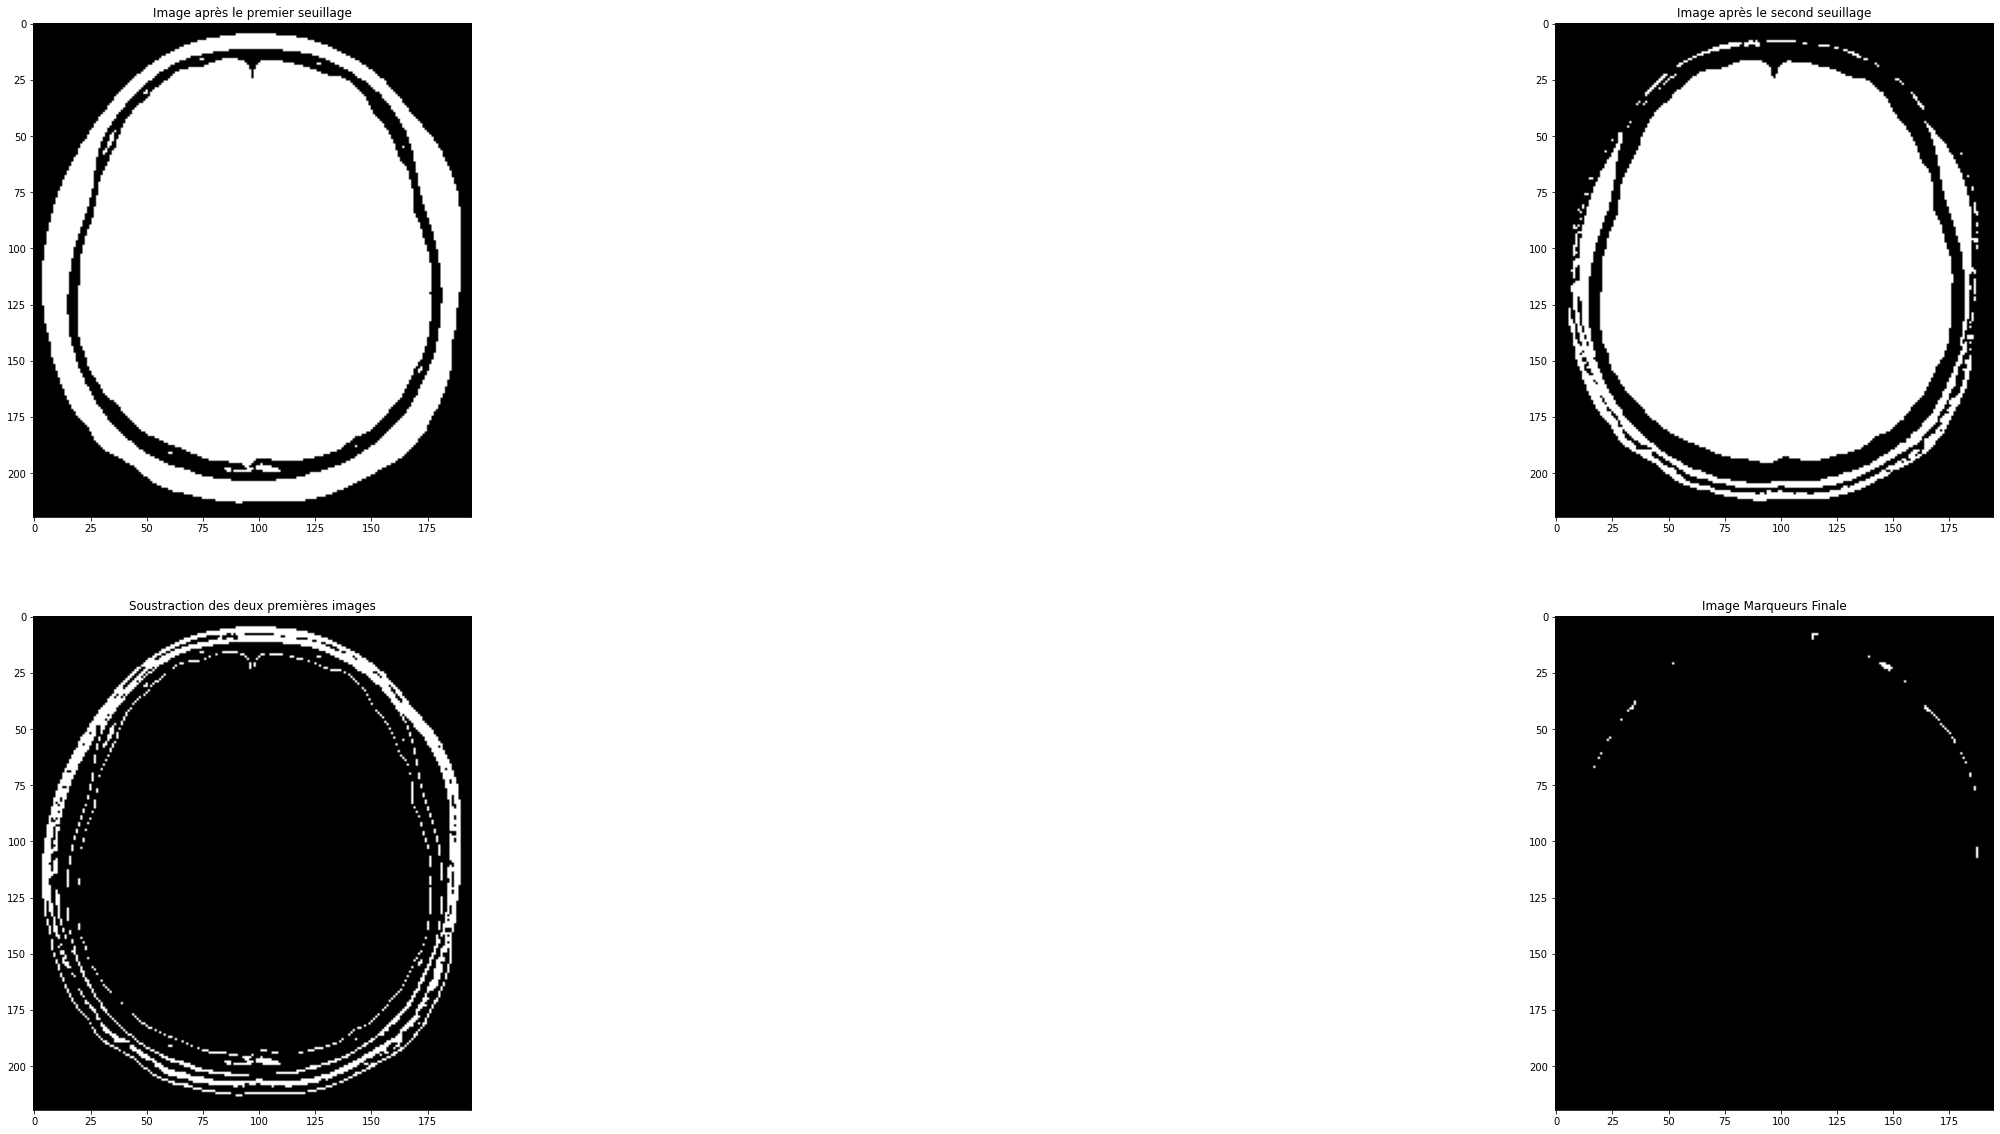

In [229]:
# A REMPLIR
# Exercice 1 : génération de l'image de marqueurs M.
imageS = cv2.threshold(image,10,255,cv2.THRESH_BINARY) # On applique un seuillage inverse pour avoir le fond en noir. Le seuillage vaut 250, si un pixels<250 on le met à 255
imageSS = imageS[1] # on récupère l'image du seuillage

image2 = cv2.threshold(image,40,255,cv2.THRESH_BINARY) # On applique un seuillage inverse pour avoir le fond en noir. Le seuillage vaut 250, si un pixels<250 on le met à 255
image2SS = image2[1]

imageM = imageSS - image2SS

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) #On créé une ellipse comme élément structurant car on veut avoir un points dans chaque smarties
M = cv2.erode(imageM, S, iterations = 1) #on l'érode  avec l'image structurant

plt.figure(figsize=(50,20))

plt.subplot(221)
plt.title("Image après le premier seuillage")
plt.imshow(imageSS,'gray') # affichage de l'image I en niveau de gris

plt.subplot(222)
plt.title("Image après le second seuillage")
plt.imshow(image2SS,'gray') # affichage de l'image I en niveau de gris

plt.subplot(223)
plt.title("Soustraction des deux premières images")
plt.imshow(imageM,'gray') # affichage de l'image I en niveau de gris

plt.subplot(224)
plt.title("Image Marqueurs Finale")
plt.imshow(M,'gray') # affichage de l'image I en niveau de gris

plt.show()

Nous devons ici avoir une image valant 1 si une certaine condition est respectée. Nous pouvons naturellement prendre la première image que nous avions générer pour nos marqueurs. En effet nous pouvons voir que le cerveau et le crane valent 1 mais ne sont pas reliée entre eux.

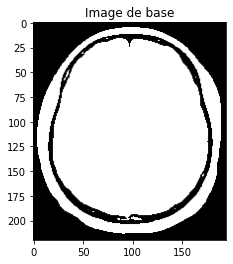

In [230]:
# A REMPLIR
# Exercice 1 : génération de l'image C.
imageS = cv2.threshold(image,10,1,cv2.THRESH_BINARY) # On applique un seuillage inverse pour avoir le fond en noir. Le seuillage vaut 250, si un pixels<250 on le met à 255
C = imageS[1] # on récupère l'image du seuillage

plt.title("Image de base")
plt.imshow(C,'gray') # affichage de l'image I en niveau de gris
plt.show()

Maintenant que nous avons C et M nous pouvons lancer l'algorithme de croissance des régions. Cette algorithme suit les étapes suivantes :
- Initialise S à M
- Parcours S et ont trouve les pixels M
- Pour tous les pixels connectés à M(x,y) et vérifiant C(x,y)=1, on fixe S(x,y)=1
- Répétez jusqu'a ce que S(x,y) soit stable

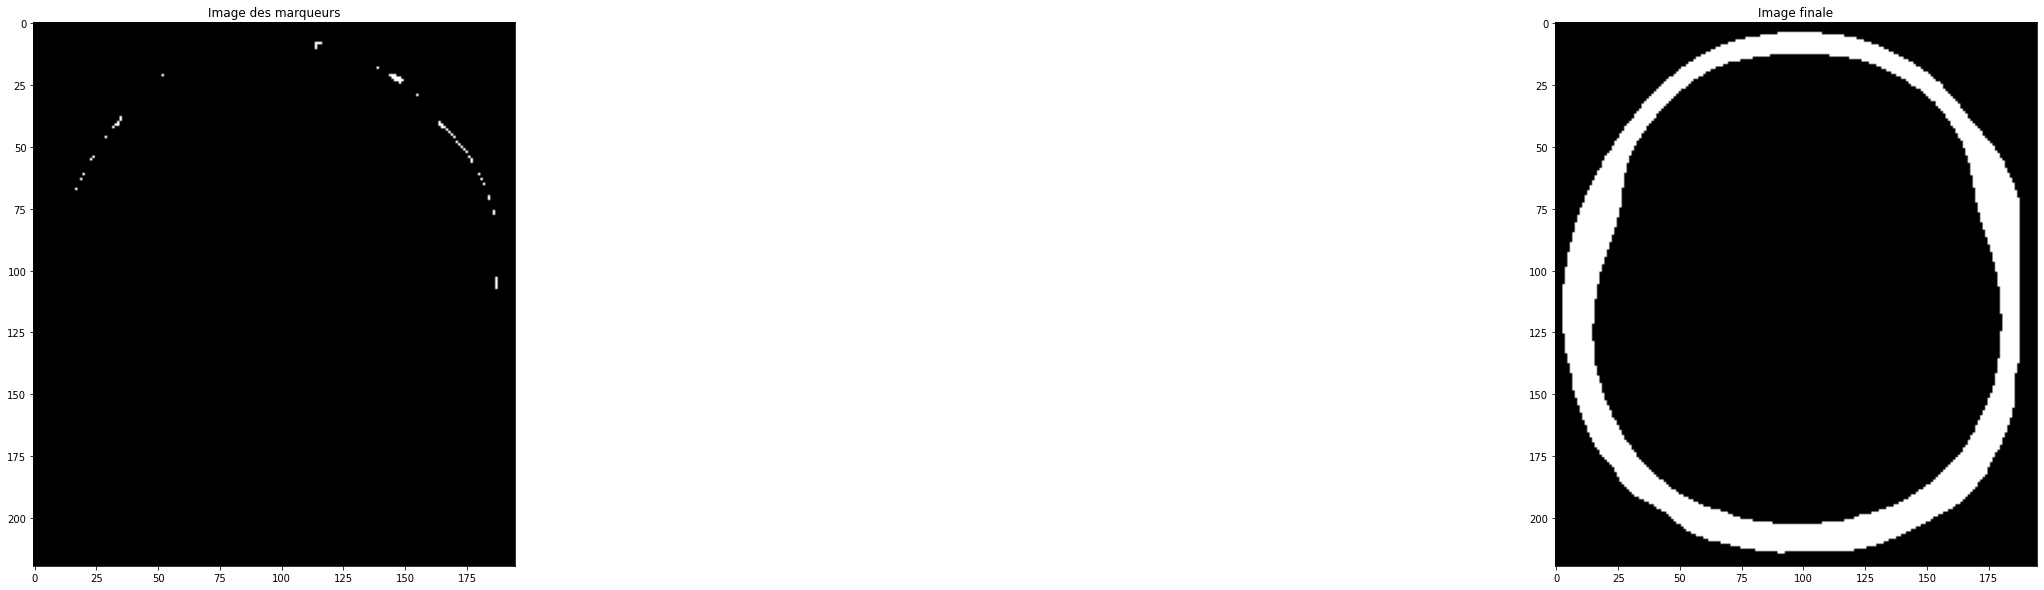

In [231]:
# A REMPLIR
# Exercice 1 : algorithme de croissance de région itératif.
s = np.size(image)
S = np.copy(image)
S2 = np.copy(M)
taille = M.shape
TailleLigne = taille[0]
TailleColonne = taille[1]
while (np.linalg.norm(np.reshape(S,s))-np.linalg.norm(np.reshape(S2,s))) != 0 : #Tant que la reconstruction n'est pas finie
    S = np.copy(S2)
    for i in range(TailleLigne):
        for j in range(TailleColonne):
            u = S2[i][j]
            v = C[i][j]
            if u==255 and v == 1 :
                if(i<TailleLigne-1):
                    S2[i+1][j]=u
                
                if(j<TailleColonne-1):
                    S2[i][j+1]==u

                if(i!=0) :
                    S2[i-1][j]=u

                if(j!=0):
                    S2[i][j-1]= u



plt.figure(figsize=(50,10))

plt.subplot(121)
plt.title("Image des marqueurs")
plt.imshow(M,'gray') # affichage de l'image I en niveau de gris

plt.subplot(122)
plt.title("Image finale")
plt.imshow(S2,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

Maintenant que nou savons une image de masque avec notre crâne valant à 1 et le reste à 0, nous voulons supprimer le crane de l'image original. Pour ce faire nous pouvons donc inverser l'image de masque, ce qui nous donne une image à 1 partout sauf à l'endroit du crane qui vaut 0. Pour enlever notre crane de l'image original il ne nous reste plus qu'a faire le minimum entre notre image de base et notre image de masque inversée. Pour vérifier que nos résultats sont cohérent, nous affichons l'image trouvée avec notre image de masque et l'image trouvé avec l'image du masque fournit. Nous pouvons voir que nous obtenons les même résultats.

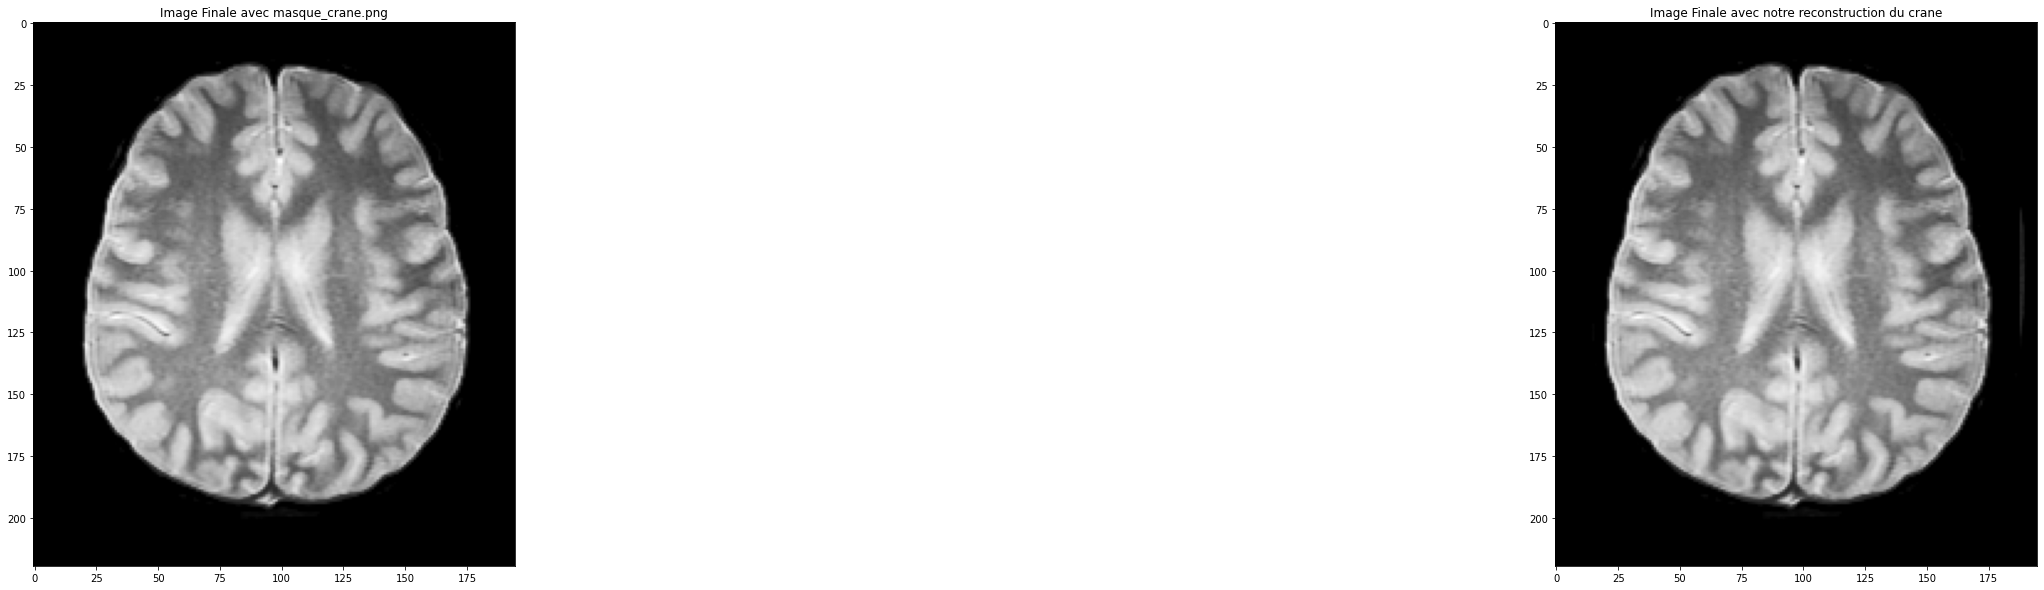

In [232]:
# A REMPLIR
# Exercice 1 : suppression du crâne sur l'image originale en utilisant la segmentation obtenue précédemment. 
# Si vous n'avez pas abouti à la question précédente, utiliser l'image de masque fournie ("masque_crane.png")
imageDonne = cv2.imread('masque_crane.png',0)

S2_inv = 255 - S2
imageF_trouve = np.minimum(image,S2_inv)
imageDonne_inv = 255-imageDonne
imageF_donne = np.minimum(image,imageDonne_inv)

plt.figure(figsize=(50,10))

plt.subplot(121)
plt.title("Image Finale avec masque_crane.png")
plt.imshow(imageF_donne,'gray') # affichage de l'image I en niveau de gris

plt.subplot(122)
plt.title("Image Finale avec notre reconstruction du crane")
plt.imshow(imageF_trouve,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

## Exercice 2 : Segmentation par LPE
Une fois le crâne supprimé de l'image originale, les trois régions restantes seront segmentées par la méthode LPE vue en TP (file d'attente hiérarchique).

Cet exercice sera décomposé en 4 étapes :
1. génération des images de marqueurs des trois régions
2. génération de l'image de distance
3. application de l'algorithme de LPE par FAH
4. affichage et analyse des résultats

Afin de donné un marqueur à notre fond nous faisons une seuillage ou nous mettons à notre fond le label 1.

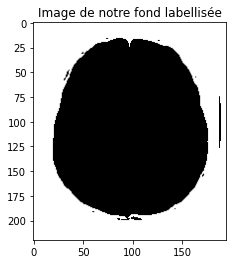

In [233]:
# A REMPLIR
# Exercice 2 : génération de l'image de marqueur du fond
image = np.copy(imageF_trouve)

imageS = cv2.threshold(image,10,2,cv2.THRESH_BINARY_INV) # On applique un seuillage inverse pour avoir le fond en noir. Le seuillage vaut 250, si un pixels<250 on le met à 255
imageF = imageS[1] # on récupère l'image du seuillage

plt.title("Image de notre fond labellisée")
plt.imshow(imageF,'gray') # affichage de l'image I en niveau de gris
plt.show()

La matière grise étant la plus claire de l'image nous pouvons essayer de faire un seuillage afin de ne garder qu'une partie de ces zones. Nous voyons que ceci ne foncitionne pas vraiment car nous n'avons pas de marqueurs pour les zones en haut à droite de notre cerveau.

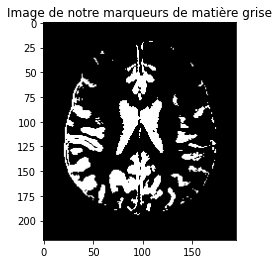

In [234]:
# A REMPLIR
# Exercice 2 : génération de l'image de marqueur de la matière grise
# Conseil : utiliser des outils de morphologie mathématique vus en TP

imageS = cv2.threshold(image,180,3,cv2.THRESH_BINARY) # On applique un seuillage inverse pour avoir le fond en noir. Le seuillage vaut 250, si un pixels<250 on le met à 255
imageMG = imageS[1] # on récupère l'image du seuillage



plt.title("Image de notre marqueurs de matière grise")
plt.imshow(imageMG,'gray') # affichage de l'image I en niveau de gris
plt.show()

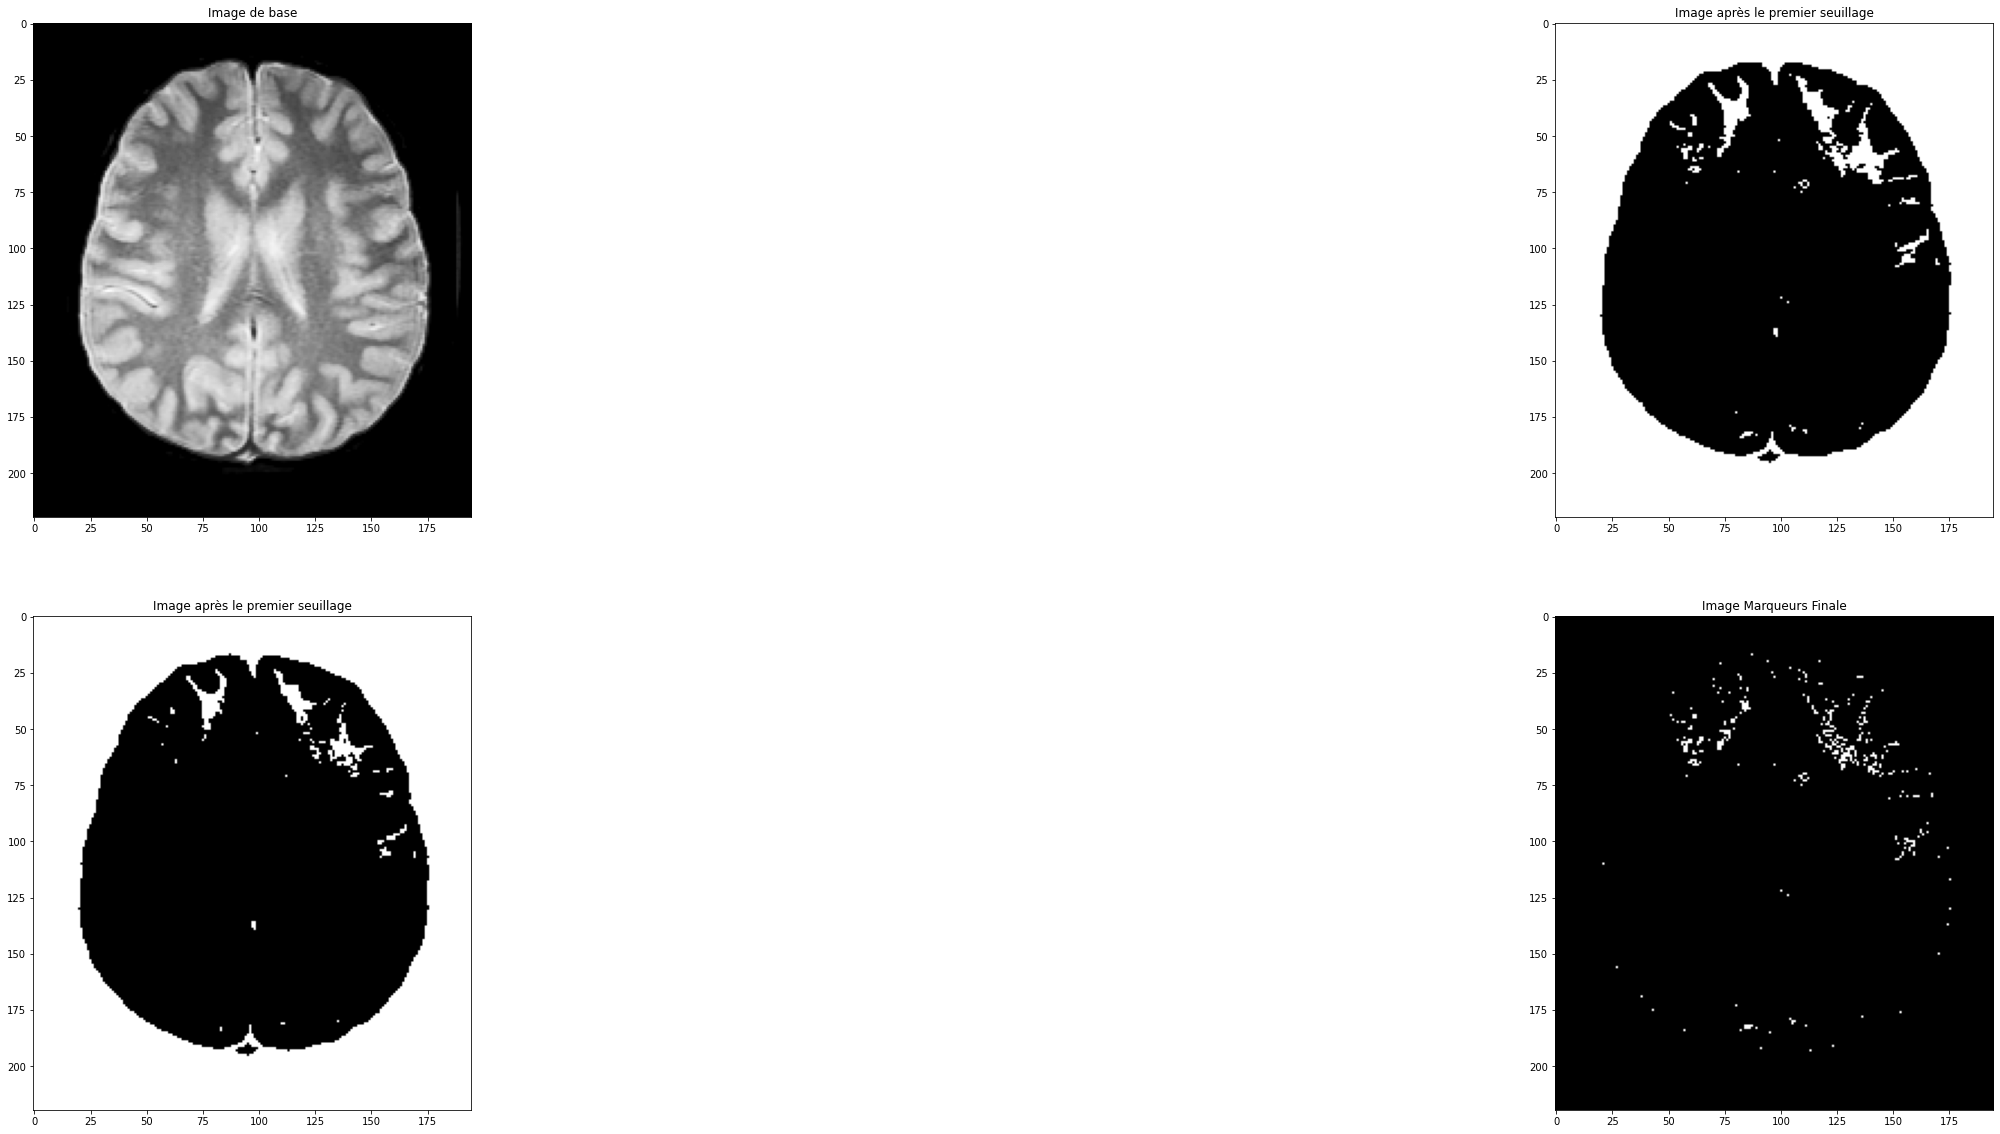

In [235]:
# A REMPLIR
# Exercice 2 : génération de l'image de marqueur de la matière blanche
# Conseil : utiliser des outils de morphologie mathématique vus en TP

imageS = cv2.threshold(image,90,4,cv2.THRESH_BINARY_INV) # On applique un seuillage inverse pour avoir le fond en noir. Le seuillage vaut 250, si un pixels<250 on le met à 255
imageMB2 = imageS[1] # on récupère l'image du seuillage

imageS = cv2.threshold(image,85,4,cv2.THRESH_BINARY_INV) # On applique un seuillage inverse pour avoir le fond en noir. Le seuillage vaut 250, si un pixels<250 on le met à 255
imagetempo = imageS[1] # on récupère l'image du seuillage

imageMB = imageMB2 - imagetempo


plt.figure(figsize=(50,20))

plt.subplot(221)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(222)
plt.title("Image après le premier seuillage")
plt.imshow(imageMB2,'gray') # affichage de l'image I en niveau de gris

plt.subplot(223)
plt.title("Image après le premier seuillage")
plt.imshow(imagetempo,'gray') # affichage de l'image I en niveau de gris

plt.subplot(224)
plt.title("Image Marqueurs Finale")
plt.imshow(imageMB,'gray') # affichage de l'image I en niveau de gris

plt.show()

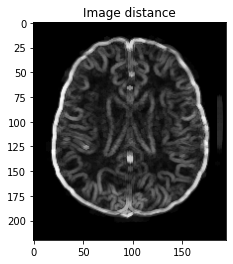

In [236]:
# A REMPLIR
# Exercice 2 : génération de distance
# Conseil : la norme du gradient de l'image sans le crâne pourra être utilisée comme image de distance

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) #On créé une ellipse comme élément structurant car on veut avoir un points dans chaque smarties
Dilat = cv2.dilate(image,S,iterations=1)
Erod = cv2.erode(image,S,iterations=1)

Grad = Dilat - Erod

plt.title("Image distance")
plt.imshow(Grad,'gray') # affichage de l'image I en niveau de gris
plt.show()

Nous pouvons voir que le gradient semble convenir comme image de distances, en effet nous avons bien que nos bords en blanc donc avec une faible priorité.

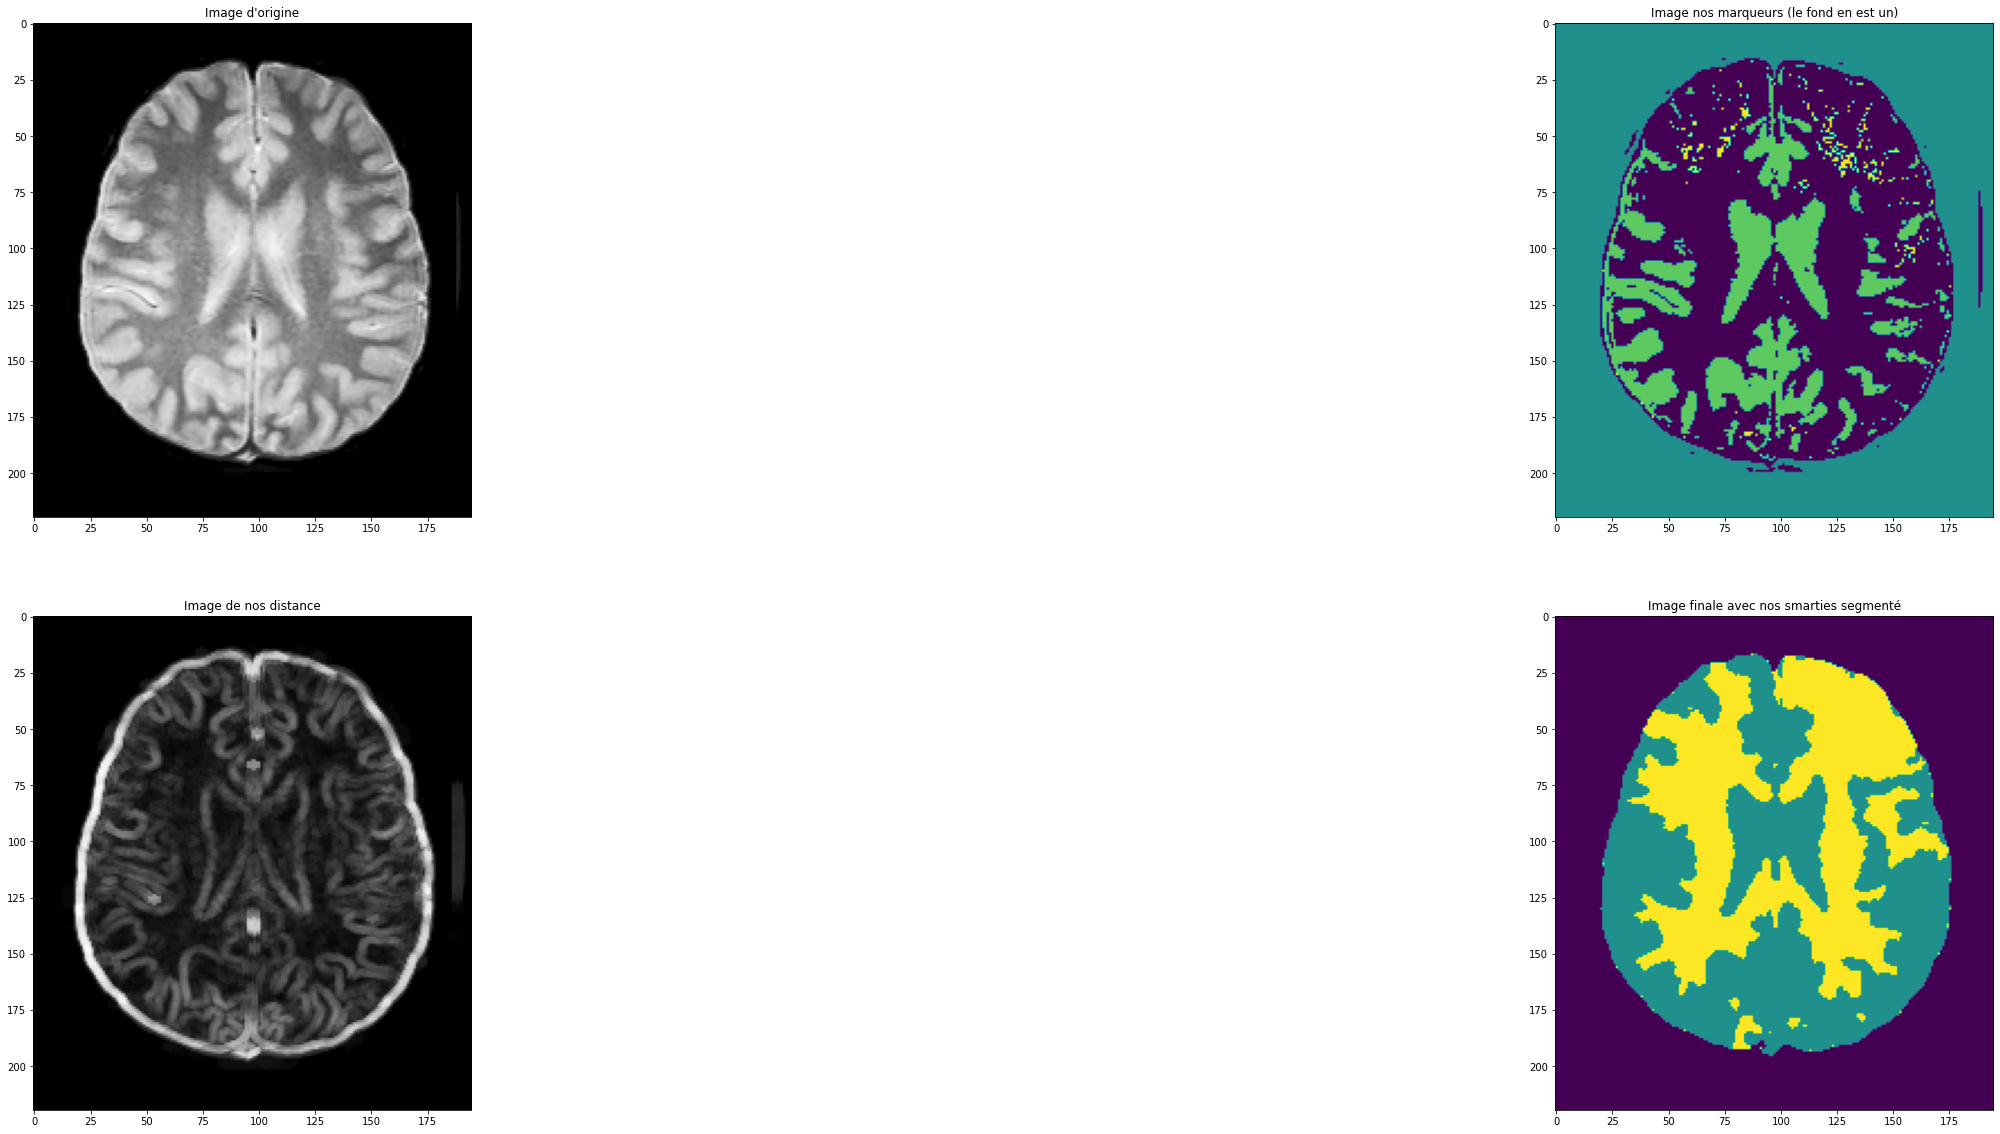

In [237]:
# A REMPLIR
# Exercice 2 : initialisation de la FAH et lancement de l'algorithme LPE
imageMarqueurs = imageF + imageMG + imageMB
imageDistFin = Grad

T = np.copy(imageMarqueurs)


CoordLigne = []
CoordColonne = []
for i in range(256):
    CoordLigne.append([])
    CoordColonne.append([])

taille = imageMarqueurs.shape
TailleLigne = taille[0]
TailleColonne = taille[1]

ImageEnregistree = {0,20,50,70,100,120,150,170,200,220,255}

for i in range(TailleLigne):
    for j in range(TailleColonne):
        if imageMarqueurs[i][j]!=0 :
            CoordLigne[imageDistFin[i][j]].append(i) # on parcours tous nos marqueurs et on les rangent selon leur priorité dans CoordLigne et CoordColonne
            CoordColonne[imageDistFin[i][j]].append(j)

min = 0
while min!=256 : # Tant que l'on a pas parcouru toutes les colonnes de CoordLigne donc tous les niveaux de priorité
    if CoordLigne[min]: # Si il y a des pixels à traiter dans la la colonne de priorités min on fait ce qui suit sinon on augment min et au passe a la priorité suivante
        while CoordLigne[min]: # Tant qu'il y a des pixels à traiter dans la colonne de priorité min
            i = CoordLigne[min].pop(0)
            j = CoordColonne[min].pop(0) # on récupère les 2 corrdonées de notre prixels

            # On regarde ses 4 voisins, si un voisin n'a pas de label, on lui attribut le label du pixel récupérer et on range les coordonnées de se nouveau pixel selon leur priorité dans CoordLigne et CoordColonne
            if(i<TailleLigne-1):
                if T[i+1][j]==0:
                    T[i+1][j]=T[i][j]
                    u = imageDistFin[i+1][j] # Si la prioritée du nouveaux pixel est inférieur à min on lui donne une nouvelle prioriée : min (car on ne repassera pas dans les colonnes qui ont déjà été traité entièrement)
                    CoordLigne[np.max([u,min])].append(i+1)
                    CoordColonne[np.max([u,min])].append(j)
                
            if(j<TailleColonne-1):
                if T[i][j+1]==0:
                    T[i][j+1]=T[i][j]
                    u = imageDistFin[i][j+1]
                    CoordLigne[np.max([u,min])].append(i)
                    CoordColonne[np.max([u,min])].append(j+1)

            if(i!=0) :
                if T[i-1][j]==0:
                    T[i-1][j]=T[i][j]
                    u = imageDistFin[i-1][j]
                    CoordLigne[np.max([u,min])].append(i-1)
                    CoordColonne[np.max([u,min])].append(j)

            if(j!=0):
                if T[i][j-1]==0:
                    T[i][j-1]=T[i][j]
                    u = imageDistFin[i][j-1]
                    CoordLigne[np.max([u,min])].append(i)
                    CoordColonne[np.max([u,min])].append(j-1)
    else : 
        #if min in ImageEnregistree :
            #im1 = plt.imsave("{}.png".format(min), T)
        min+=1


plt.figure(figsize=(50,20))


plt.subplot(221)
plt.title("Image d'origine")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris


plt.subplot(222)
plt.title("Image nos marqueurs (le fond en est un)")
plt.imshow(imageMarqueurs) # affichage de l'image I en niveau de gris

plt.subplot(223)
plt.title("Image de nos distance")
plt.imshow(imageDistFin,'gray') # affichage de l'image I en niveau de gris

plt.subplot(224)

plt.title("Image finale avec nos smarties segmenté")
plt.imshow(T) # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

Nous pouvons voir que notre segmentation n'est pas optimisée, cela est du au fait que nous avons des mauvaises images de marqueurs, pour la matière grise nous pouvons voir qu'il manque des marqueurs en haut à droite dans notre cerveau et/ou nous avons des marqueurs de notre matire blanche qui sont au mauvais endroits.

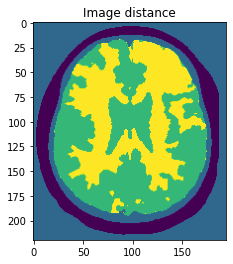

In [238]:
# A REMPLIR
# Exercice 2 : affichage et analyse des résultats (les images générées pourront être exportées au format png et rendues avec le Notebook)
image_fina = T + S2
plt.title("Image distance")
plt.imshow(image_fina) # affichage de l'image I en niveau de gris
plt.show()